In [21]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [22]:
# Load the data
etfs = ['SPY', 'VGK', 'IEF', 'LQD', 'USO', 'GLD', 'VNQ', 'RWO', 'IWM', 'HYG', 'DBC']
adj_close = pd.read_csv('historical_prices.csv', index_col='Date', parse_dates=True)
returns = adj_close.pct_change().dropna()
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252
risk_free_rate = 0.00

In [23]:
# Define the fitness function (Sharpe Ratio)
def fitness_function(weights, mean_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return sharpe_ratio

In [24]:
# Genetic Algorithm parameters
population_size = 200
num_generations = 10000
mutation_rate = 0.01
num_assets = len(mean_returns)


In [25]:
# Initialize population with random weights
population = np.random.dirichlet(np.ones(num_assets), size=population_size)

# Track best fitness over generations
best_fitness_over_time = []

In [26]:
# Main GA loop
for generation in range(num_generations):
    # Evaluate fitness: Calculate Sharpe ratio for each portfolio in the population
    fitness = np.array([fitness_function(individual, mean_returns, cov_matrix, risk_free_rate) for individual in population])
    
        # Normalize fitness values to ensure they are non-negative
    min_fitness = fitness.min()
    if min_fitness < 0:
        fitness -= min_fitness

    # Handle case where the total fitness sum is zero
    if fitness.sum() == 0:
        fitness = np.ones_like(fitness) / len(fitness)
    else:
        probabilities = fitness / fitness.sum()
        
    selected_indices = np.random.choice(population_size, size=population_size, p=probabilities)
    selected_population = population[selected_indices]

    # Crossover: Create new population through crossover of selected parents
    new_population = []
    for i in range(population_size // 2):
        parent1 = selected_population[i]
        parent2 = selected_population[population_size // 2 + i]

        # Single point crossover
        crossover_point = np.random.randint(1, num_assets)
        child1 = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
        child2 = np.concatenate([parent2[:crossover_point], parent1[crossover_point:]])

        new_population.extend([child1, child2])

    new_population = np.array(new_population)

    # Mutation: Introduce random changes to maintain diversity
    for individual in new_population:
        if np.random.rand() < mutation_rate:
            mutation_point = np.random.randint(num_assets)
            individual[mutation_point] = np.random.rand()

        # Normalize the individual to ensure the weights sum to 1
        individual /= individual.sum()

    # Replace old population with new population
    population = new_population

    # Track the best solution in the current generation
    best_fitness_idx = np.argmax(fitness)
    best_solution = population[best_fitness_idx]
    best_fitness = fitness[best_fitness_idx]

    best_fitness_over_time.append(best_fitness)
    print(f'Generation {generation}: Best Fitness = {best_fitness:.4f}')

Generation 0: Best Fitness = 0.7169
Generation 1: Best Fitness = 0.7780
Generation 2: Best Fitness = 0.7608
Generation 3: Best Fitness = 0.7695
Generation 4: Best Fitness = 0.7259
Generation 5: Best Fitness = 0.7222
Generation 6: Best Fitness = 0.7635
Generation 7: Best Fitness = 0.7695
Generation 8: Best Fitness = 0.7558
Generation 9: Best Fitness = 0.7607
Generation 10: Best Fitness = 0.7663
Generation 11: Best Fitness = 0.7479
Generation 12: Best Fitness = 0.7955
Generation 13: Best Fitness = 0.7819
Generation 14: Best Fitness = 0.7538
Generation 15: Best Fitness = 0.7668
Generation 16: Best Fitness = 0.7489
Generation 17: Best Fitness = 0.8163
Generation 18: Best Fitness = 0.8320
Generation 19: Best Fitness = 0.7542
Generation 20: Best Fitness = 0.7753
Generation 21: Best Fitness = 0.7428
Generation 22: Best Fitness = 0.7740
Generation 23: Best Fitness = 0.7721
Generation 24: Best Fitness = 0.7763
Generation 25: Best Fitness = 0.8358
Generation 26: Best Fitness = 0.7605
Generation 

Generation 237: Best Fitness = 0.8807
Generation 238: Best Fitness = 0.9078
Generation 239: Best Fitness = 0.8816
Generation 240: Best Fitness = 0.8356
Generation 241: Best Fitness = 0.8539
Generation 242: Best Fitness = 0.8354
Generation 243: Best Fitness = 0.8507
Generation 244: Best Fitness = 0.8380
Generation 245: Best Fitness = 0.8316
Generation 246: Best Fitness = 0.8368
Generation 247: Best Fitness = 0.8458
Generation 248: Best Fitness = 0.8390
Generation 249: Best Fitness = 0.8427
Generation 250: Best Fitness = 0.8400
Generation 251: Best Fitness = 0.8397
Generation 252: Best Fitness = 0.8421
Generation 253: Best Fitness = 0.8604
Generation 254: Best Fitness = 0.8426
Generation 255: Best Fitness = 0.8420
Generation 256: Best Fitness = 0.8407
Generation 257: Best Fitness = 0.8452
Generation 258: Best Fitness = 0.8441
Generation 259: Best Fitness = 0.8447
Generation 260: Best Fitness = 0.8444
Generation 261: Best Fitness = 0.8447
Generation 262: Best Fitness = 0.8577
Generation 2

Generation 472: Best Fitness = 0.8772
Generation 473: Best Fitness = 0.8772
Generation 474: Best Fitness = 0.8885
Generation 475: Best Fitness = 0.8764
Generation 476: Best Fitness = 0.8761
Generation 477: Best Fitness = 0.8774
Generation 478: Best Fitness = 0.8721
Generation 479: Best Fitness = 0.8732
Generation 480: Best Fitness = 0.9027
Generation 481: Best Fitness = 0.8857
Generation 482: Best Fitness = 0.8864
Generation 483: Best Fitness = 0.8858
Generation 484: Best Fitness = 0.8866
Generation 485: Best Fitness = 0.8840
Generation 486: Best Fitness = 0.8895
Generation 487: Best Fitness = 0.8875
Generation 488: Best Fitness = 0.8881
Generation 489: Best Fitness = 0.8878
Generation 490: Best Fitness = 0.8844
Generation 491: Best Fitness = 0.8818
Generation 492: Best Fitness = 0.8796
Generation 493: Best Fitness = 0.8860
Generation 494: Best Fitness = 0.8928
Generation 495: Best Fitness = 0.8814
Generation 496: Best Fitness = 0.8736
Generation 497: Best Fitness = 0.8651
Generation 4

Generation 708: Best Fitness = 0.9000
Generation 709: Best Fitness = 0.8977
Generation 710: Best Fitness = 0.8945
Generation 711: Best Fitness = 0.8949
Generation 712: Best Fitness = 0.8995
Generation 713: Best Fitness = 0.8930
Generation 714: Best Fitness = 0.8988
Generation 715: Best Fitness = 0.8986
Generation 716: Best Fitness = 0.9074
Generation 717: Best Fitness = 0.9077
Generation 718: Best Fitness = 0.9184
Generation 719: Best Fitness = 0.9272
Generation 720: Best Fitness = 0.9258
Generation 721: Best Fitness = 0.9272
Generation 722: Best Fitness = 0.9207
Generation 723: Best Fitness = 0.9076
Generation 724: Best Fitness = 0.8994
Generation 725: Best Fitness = 0.9051
Generation 726: Best Fitness = 0.9053
Generation 727: Best Fitness = 0.9038
Generation 728: Best Fitness = 0.9091
Generation 729: Best Fitness = 0.9024
Generation 730: Best Fitness = 0.9041
Generation 731: Best Fitness = 0.8981
Generation 732: Best Fitness = 0.8925
Generation 733: Best Fitness = 0.8945
Generation 7

Generation 941: Best Fitness = 0.9296
Generation 942: Best Fitness = 0.9250
Generation 943: Best Fitness = 0.9108
Generation 944: Best Fitness = 0.9050
Generation 945: Best Fitness = 0.9049
Generation 946: Best Fitness = 0.8978
Generation 947: Best Fitness = 0.9026
Generation 948: Best Fitness = 0.9026
Generation 949: Best Fitness = 0.9149
Generation 950: Best Fitness = 0.9215
Generation 951: Best Fitness = 0.9166
Generation 952: Best Fitness = 0.9098
Generation 953: Best Fitness = 0.9028
Generation 954: Best Fitness = 0.9068
Generation 955: Best Fitness = 0.8981
Generation 956: Best Fitness = 0.9074
Generation 957: Best Fitness = 0.8992
Generation 958: Best Fitness = 0.9001
Generation 959: Best Fitness = 0.9005
Generation 960: Best Fitness = 0.9080
Generation 961: Best Fitness = 0.9143
Generation 962: Best Fitness = 0.9143
Generation 963: Best Fitness = 0.9164
Generation 964: Best Fitness = 0.9118
Generation 965: Best Fitness = 0.9135
Generation 966: Best Fitness = 0.9123
Generation 9

Generation 1154: Best Fitness = 0.9212
Generation 1155: Best Fitness = 0.9236
Generation 1156: Best Fitness = 0.9299
Generation 1157: Best Fitness = 0.9284
Generation 1158: Best Fitness = 0.9236
Generation 1159: Best Fitness = 0.9324
Generation 1160: Best Fitness = 0.9336
Generation 1161: Best Fitness = 0.9184
Generation 1162: Best Fitness = 0.9419
Generation 1163: Best Fitness = 0.9388
Generation 1164: Best Fitness = 0.9350
Generation 1165: Best Fitness = 0.9420
Generation 1166: Best Fitness = 0.9300
Generation 1167: Best Fitness = 0.9301
Generation 1168: Best Fitness = 0.9202
Generation 1169: Best Fitness = 0.9227
Generation 1170: Best Fitness = 0.9213
Generation 1171: Best Fitness = 0.9190
Generation 1172: Best Fitness = 0.9193
Generation 1173: Best Fitness = 0.9249
Generation 1174: Best Fitness = 0.9247
Generation 1175: Best Fitness = 0.9196
Generation 1176: Best Fitness = 0.9190
Generation 1177: Best Fitness = 0.9184
Generation 1178: Best Fitness = 0.9222
Generation 1179: Best Fit

Generation 1366: Best Fitness = 0.9249
Generation 1367: Best Fitness = 0.9198
Generation 1368: Best Fitness = 0.9181
Generation 1369: Best Fitness = 0.9186
Generation 1370: Best Fitness = 0.9240
Generation 1371: Best Fitness = 0.9219
Generation 1372: Best Fitness = 0.9435
Generation 1373: Best Fitness = 0.9208
Generation 1374: Best Fitness = 0.9222
Generation 1375: Best Fitness = 0.9196
Generation 1376: Best Fitness = 0.9207
Generation 1377: Best Fitness = 0.9204
Generation 1378: Best Fitness = 0.9152
Generation 1379: Best Fitness = 0.9198
Generation 1380: Best Fitness = 0.9169
Generation 1381: Best Fitness = 0.9236
Generation 1382: Best Fitness = 0.9167
Generation 1383: Best Fitness = 0.9187
Generation 1384: Best Fitness = 0.9404
Generation 1385: Best Fitness = 0.9193
Generation 1386: Best Fitness = 0.9204
Generation 1387: Best Fitness = 0.9187
Generation 1388: Best Fitness = 0.9207
Generation 1389: Best Fitness = 0.9186
Generation 1390: Best Fitness = 0.9330
Generation 1391: Best Fit

Generation 1602: Best Fitness = 0.9208
Generation 1603: Best Fitness = 0.9188
Generation 1604: Best Fitness = 0.9184
Generation 1605: Best Fitness = 0.9211
Generation 1606: Best Fitness = 0.9183
Generation 1607: Best Fitness = 0.9409
Generation 1608: Best Fitness = 0.9155
Generation 1609: Best Fitness = 0.9181
Generation 1610: Best Fitness = 0.9152
Generation 1611: Best Fitness = 0.9184
Generation 1612: Best Fitness = 0.9153
Generation 1613: Best Fitness = 0.9159
Generation 1614: Best Fitness = 0.9238
Generation 1615: Best Fitness = 0.9388
Generation 1616: Best Fitness = 0.9257
Generation 1617: Best Fitness = 0.9208
Generation 1618: Best Fitness = 0.9225
Generation 1619: Best Fitness = 0.9148
Generation 1620: Best Fitness = 0.9132
Generation 1621: Best Fitness = 0.9271
Generation 1622: Best Fitness = 0.9178
Generation 1623: Best Fitness = 0.9171
Generation 1624: Best Fitness = 0.9159
Generation 1625: Best Fitness = 0.9159
Generation 1626: Best Fitness = 0.9166
Generation 1627: Best Fit

Generation 1813: Best Fitness = 0.9175
Generation 1814: Best Fitness = 0.9222
Generation 1815: Best Fitness = 0.9209
Generation 1816: Best Fitness = 0.9281
Generation 1817: Best Fitness = 0.9214
Generation 1818: Best Fitness = 0.9361
Generation 1819: Best Fitness = 0.9211
Generation 1820: Best Fitness = 0.9278
Generation 1821: Best Fitness = 0.9274
Generation 1822: Best Fitness = 0.9275
Generation 1823: Best Fitness = 0.9398
Generation 1824: Best Fitness = 0.9330
Generation 1825: Best Fitness = 0.9340
Generation 1826: Best Fitness = 0.9291
Generation 1827: Best Fitness = 0.9315
Generation 1828: Best Fitness = 0.9293
Generation 1829: Best Fitness = 0.9263
Generation 1830: Best Fitness = 0.9272
Generation 1831: Best Fitness = 0.9271
Generation 1832: Best Fitness = 0.9293
Generation 1833: Best Fitness = 0.9300
Generation 1834: Best Fitness = 0.9446
Generation 1835: Best Fitness = 0.9355
Generation 1836: Best Fitness = 0.9552
Generation 1837: Best Fitness = 0.9531
Generation 1838: Best Fit

Generation 2025: Best Fitness = 0.9367
Generation 2026: Best Fitness = 0.9408
Generation 2027: Best Fitness = 0.9408
Generation 2028: Best Fitness = 0.9393
Generation 2029: Best Fitness = 0.9422
Generation 2030: Best Fitness = 0.9368
Generation 2031: Best Fitness = 0.9373
Generation 2032: Best Fitness = 0.9512
Generation 2033: Best Fitness = 0.9437
Generation 2034: Best Fitness = 0.9406
Generation 2035: Best Fitness = 0.9467
Generation 2036: Best Fitness = 0.9378
Generation 2037: Best Fitness = 0.9525
Generation 2038: Best Fitness = 0.9459
Generation 2039: Best Fitness = 0.9424
Generation 2040: Best Fitness = 0.9433
Generation 2041: Best Fitness = 0.9443
Generation 2042: Best Fitness = 0.9422
Generation 2043: Best Fitness = 0.9433
Generation 2044: Best Fitness = 0.9410
Generation 2045: Best Fitness = 0.9405
Generation 2046: Best Fitness = 0.9395
Generation 2047: Best Fitness = 0.9433
Generation 2048: Best Fitness = 0.9479
Generation 2049: Best Fitness = 0.9438
Generation 2050: Best Fit

Generation 2262: Best Fitness = 0.9473
Generation 2263: Best Fitness = 0.9430
Generation 2264: Best Fitness = 0.9405
Generation 2265: Best Fitness = 0.9381
Generation 2266: Best Fitness = 0.9394
Generation 2267: Best Fitness = 0.9423
Generation 2268: Best Fitness = 0.9412
Generation 2269: Best Fitness = 0.9548
Generation 2270: Best Fitness = 0.9548
Generation 2271: Best Fitness = 0.9428
Generation 2272: Best Fitness = 0.9581
Generation 2273: Best Fitness = 0.9424
Generation 2274: Best Fitness = 0.9611
Generation 2275: Best Fitness = 0.9614
Generation 2276: Best Fitness = 0.9432
Generation 2277: Best Fitness = 0.9505
Generation 2278: Best Fitness = 0.9526
Generation 2279: Best Fitness = 0.9509
Generation 2280: Best Fitness = 0.9679
Generation 2281: Best Fitness = 0.9635
Generation 2282: Best Fitness = 0.9634
Generation 2283: Best Fitness = 0.9590
Generation 2284: Best Fitness = 0.9590
Generation 2285: Best Fitness = 0.9503
Generation 2286: Best Fitness = 0.9530
Generation 2287: Best Fit

Generation 2474: Best Fitness = 0.9383
Generation 2475: Best Fitness = 0.9484
Generation 2476: Best Fitness = 0.9383
Generation 2477: Best Fitness = 0.9458
Generation 2478: Best Fitness = 0.9355
Generation 2479: Best Fitness = 0.9383
Generation 2480: Best Fitness = 0.9354
Generation 2481: Best Fitness = 0.9354
Generation 2482: Best Fitness = 0.9378
Generation 2483: Best Fitness = 0.9423
Generation 2484: Best Fitness = 0.9403
Generation 2485: Best Fitness = 0.9546
Generation 2486: Best Fitness = 0.9420
Generation 2487: Best Fitness = 0.9554
Generation 2488: Best Fitness = 0.9587
Generation 2489: Best Fitness = 0.9622
Generation 2490: Best Fitness = 0.9449
Generation 2491: Best Fitness = 0.9394
Generation 2492: Best Fitness = 0.9483
Generation 2493: Best Fitness = 0.9429
Generation 2494: Best Fitness = 0.9457
Generation 2495: Best Fitness = 0.9418
Generation 2496: Best Fitness = 0.9433
Generation 2497: Best Fitness = 0.9423
Generation 2498: Best Fitness = 0.9384
Generation 2499: Best Fit

Generation 2711: Best Fitness = 0.9492
Generation 2712: Best Fitness = 0.9537
Generation 2713: Best Fitness = 0.9539
Generation 2714: Best Fitness = 0.9493
Generation 2715: Best Fitness = 0.9482
Generation 2716: Best Fitness = 0.9476
Generation 2717: Best Fitness = 0.9488
Generation 2718: Best Fitness = 0.9464
Generation 2719: Best Fitness = 0.9439
Generation 2720: Best Fitness = 0.9446
Generation 2721: Best Fitness = 0.9473
Generation 2722: Best Fitness = 0.9441
Generation 2723: Best Fitness = 0.9461
Generation 2724: Best Fitness = 0.9496
Generation 2725: Best Fitness = 0.9497
Generation 2726: Best Fitness = 0.9528
Generation 2727: Best Fitness = 0.9522
Generation 2728: Best Fitness = 0.9527
Generation 2729: Best Fitness = 0.9483
Generation 2730: Best Fitness = 0.9458
Generation 2731: Best Fitness = 0.9559
Generation 2732: Best Fitness = 0.9577
Generation 2733: Best Fitness = 0.9545
Generation 2734: Best Fitness = 0.9519
Generation 2735: Best Fitness = 0.9626
Generation 2736: Best Fit

Generation 2939: Best Fitness = 0.9442
Generation 2940: Best Fitness = 0.9443
Generation 2941: Best Fitness = 0.9507
Generation 2942: Best Fitness = 0.9565
Generation 2943: Best Fitness = 0.9549
Generation 2944: Best Fitness = 0.9522
Generation 2945: Best Fitness = 0.9479
Generation 2946: Best Fitness = 0.9528
Generation 2947: Best Fitness = 0.9553
Generation 2948: Best Fitness = 0.9553
Generation 2949: Best Fitness = 0.9521
Generation 2950: Best Fitness = 0.9509
Generation 2951: Best Fitness = 0.9486
Generation 2952: Best Fitness = 0.9508
Generation 2953: Best Fitness = 0.9487
Generation 2954: Best Fitness = 0.9433
Generation 2955: Best Fitness = 0.9485
Generation 2956: Best Fitness = 0.9480
Generation 2957: Best Fitness = 0.9484
Generation 2958: Best Fitness = 0.9479
Generation 2959: Best Fitness = 0.9457
Generation 2960: Best Fitness = 0.9357
Generation 2961: Best Fitness = 0.9400
Generation 2962: Best Fitness = 0.9412
Generation 2963: Best Fitness = 0.9402
Generation 2964: Best Fit

Generation 3170: Best Fitness = 0.9410
Generation 3171: Best Fitness = 0.9560
Generation 3172: Best Fitness = 0.9413
Generation 3173: Best Fitness = 0.9384
Generation 3174: Best Fitness = 0.9408
Generation 3175: Best Fitness = 0.9495
Generation 3176: Best Fitness = 0.9393
Generation 3177: Best Fitness = 0.9352
Generation 3178: Best Fitness = 0.9353
Generation 3179: Best Fitness = 0.9389
Generation 3180: Best Fitness = 0.9370
Generation 3181: Best Fitness = 0.9372
Generation 3182: Best Fitness = 0.9364
Generation 3183: Best Fitness = 0.9393
Generation 3184: Best Fitness = 0.9376
Generation 3185: Best Fitness = 0.9389
Generation 3186: Best Fitness = 0.9376
Generation 3187: Best Fitness = 0.9353
Generation 3188: Best Fitness = 0.9375
Generation 3189: Best Fitness = 0.9335
Generation 3190: Best Fitness = 0.9474
Generation 3191: Best Fitness = 0.9441
Generation 3192: Best Fitness = 0.9310
Generation 3193: Best Fitness = 0.9430
Generation 3194: Best Fitness = 0.9430
Generation 3195: Best Fit

Generation 3400: Best Fitness = 0.9388
Generation 3401: Best Fitness = 0.9355
Generation 3402: Best Fitness = 0.9406
Generation 3403: Best Fitness = 0.9379
Generation 3404: Best Fitness = 0.9379
Generation 3405: Best Fitness = 0.9349
Generation 3406: Best Fitness = 0.9356
Generation 3407: Best Fitness = 0.9356
Generation 3408: Best Fitness = 0.9343
Generation 3409: Best Fitness = 0.9326
Generation 3410: Best Fitness = 0.9331
Generation 3411: Best Fitness = 0.9353
Generation 3412: Best Fitness = 0.9456
Generation 3413: Best Fitness = 0.9351
Generation 3414: Best Fitness = 0.9333
Generation 3415: Best Fitness = 0.9331
Generation 3416: Best Fitness = 0.9349
Generation 3417: Best Fitness = 0.9349
Generation 3418: Best Fitness = 0.9361
Generation 3419: Best Fitness = 0.9398
Generation 3420: Best Fitness = 0.9387
Generation 3421: Best Fitness = 0.9367
Generation 3422: Best Fitness = 0.9320
Generation 3423: Best Fitness = 0.9318
Generation 3424: Best Fitness = 0.9312
Generation 3425: Best Fit

Generation 3613: Best Fitness = 0.9388
Generation 3614: Best Fitness = 0.9434
Generation 3615: Best Fitness = 0.9376
Generation 3616: Best Fitness = 0.9384
Generation 3617: Best Fitness = 0.9323
Generation 3618: Best Fitness = 0.9325
Generation 3619: Best Fitness = 0.9372
Generation 3620: Best Fitness = 0.9427
Generation 3621: Best Fitness = 0.9385
Generation 3622: Best Fitness = 0.9449
Generation 3623: Best Fitness = 0.9437
Generation 3624: Best Fitness = 0.9367
Generation 3625: Best Fitness = 0.9455
Generation 3626: Best Fitness = 0.9428
Generation 3627: Best Fitness = 0.9441
Generation 3628: Best Fitness = 0.9444
Generation 3629: Best Fitness = 0.9355
Generation 3630: Best Fitness = 0.9453
Generation 3631: Best Fitness = 0.9430
Generation 3632: Best Fitness = 0.9427
Generation 3633: Best Fitness = 0.9414
Generation 3634: Best Fitness = 0.9403
Generation 3635: Best Fitness = 0.9405
Generation 3636: Best Fitness = 0.9374
Generation 3637: Best Fitness = 0.9382
Generation 3638: Best Fit

Generation 3839: Best Fitness = 0.9394
Generation 3840: Best Fitness = 0.9418
Generation 3841: Best Fitness = 0.9391
Generation 3842: Best Fitness = 0.9378
Generation 3843: Best Fitness = 0.9389
Generation 3844: Best Fitness = 0.9394
Generation 3845: Best Fitness = 0.9389
Generation 3846: Best Fitness = 0.9365
Generation 3847: Best Fitness = 0.9383
Generation 3848: Best Fitness = 0.9385
Generation 3849: Best Fitness = 0.9383
Generation 3850: Best Fitness = 0.9383
Generation 3851: Best Fitness = 0.9625
Generation 3852: Best Fitness = 0.9480
Generation 3853: Best Fitness = 0.9427
Generation 3854: Best Fitness = 0.9362
Generation 3855: Best Fitness = 0.9654
Generation 3856: Best Fitness = 0.9359
Generation 3857: Best Fitness = 0.9358
Generation 3858: Best Fitness = 0.9490
Generation 3859: Best Fitness = 0.9504
Generation 3860: Best Fitness = 0.9503
Generation 3861: Best Fitness = 0.9462
Generation 3862: Best Fitness = 0.9477
Generation 3863: Best Fitness = 0.9421
Generation 3864: Best Fit

Generation 4060: Best Fitness = 0.9518
Generation 4061: Best Fitness = 0.9454
Generation 4062: Best Fitness = 0.9588
Generation 4063: Best Fitness = 0.9587
Generation 4064: Best Fitness = 0.9544
Generation 4065: Best Fitness = 0.9620
Generation 4066: Best Fitness = 0.9568
Generation 4067: Best Fitness = 0.9532
Generation 4068: Best Fitness = 0.9538
Generation 4069: Best Fitness = 0.9476
Generation 4070: Best Fitness = 0.9616
Generation 4071: Best Fitness = 0.9508
Generation 4072: Best Fitness = 0.9448
Generation 4073: Best Fitness = 0.9482
Generation 4074: Best Fitness = 0.9537
Generation 4075: Best Fitness = 0.9518
Generation 4076: Best Fitness = 0.9520
Generation 4077: Best Fitness = 0.9600
Generation 4078: Best Fitness = 0.9534
Generation 4079: Best Fitness = 0.9669
Generation 4080: Best Fitness = 0.9679
Generation 4081: Best Fitness = 0.9669
Generation 4082: Best Fitness = 0.9572
Generation 4083: Best Fitness = 0.9553
Generation 4084: Best Fitness = 0.9580
Generation 4085: Best Fit

Generation 4279: Best Fitness = 0.9590
Generation 4280: Best Fitness = 0.9549
Generation 4281: Best Fitness = 0.9613
Generation 4282: Best Fitness = 0.9566
Generation 4283: Best Fitness = 0.9581
Generation 4284: Best Fitness = 0.9623
Generation 4285: Best Fitness = 0.9679
Generation 4286: Best Fitness = 0.9773
Generation 4287: Best Fitness = 0.9652
Generation 4288: Best Fitness = 0.9591
Generation 4289: Best Fitness = 0.9621
Generation 4290: Best Fitness = 0.9581
Generation 4291: Best Fitness = 0.9577
Generation 4292: Best Fitness = 0.9601
Generation 4293: Best Fitness = 0.9561
Generation 4294: Best Fitness = 0.9558
Generation 4295: Best Fitness = 0.9561
Generation 4296: Best Fitness = 0.9664
Generation 4297: Best Fitness = 0.9539
Generation 4298: Best Fitness = 0.9538
Generation 4299: Best Fitness = 0.9494
Generation 4300: Best Fitness = 0.9569
Generation 4301: Best Fitness = 0.9520
Generation 4302: Best Fitness = 0.9523
Generation 4303: Best Fitness = 0.9537
Generation 4304: Best Fit

Generation 4498: Best Fitness = 0.9631
Generation 4499: Best Fitness = 0.9645
Generation 4500: Best Fitness = 0.9570
Generation 4501: Best Fitness = 0.9607
Generation 4502: Best Fitness = 0.9602
Generation 4503: Best Fitness = 0.9517
Generation 4504: Best Fitness = 0.9682
Generation 4505: Best Fitness = 0.9587
Generation 4506: Best Fitness = 0.9526
Generation 4507: Best Fitness = 0.9565
Generation 4508: Best Fitness = 0.9627
Generation 4509: Best Fitness = 0.9554
Generation 4510: Best Fitness = 0.9534
Generation 4511: Best Fitness = 0.9545
Generation 4512: Best Fitness = 0.9575
Generation 4513: Best Fitness = 0.9565
Generation 4514: Best Fitness = 0.9525
Generation 4515: Best Fitness = 0.9578
Generation 4516: Best Fitness = 0.9521
Generation 4517: Best Fitness = 0.9534
Generation 4518: Best Fitness = 0.9518
Generation 4519: Best Fitness = 0.9596
Generation 4520: Best Fitness = 0.9615
Generation 4521: Best Fitness = 0.9535
Generation 4522: Best Fitness = 0.9558
Generation 4523: Best Fit

Generation 4719: Best Fitness = 0.9654
Generation 4720: Best Fitness = 0.9618
Generation 4721: Best Fitness = 0.9685
Generation 4722: Best Fitness = 0.9686
Generation 4723: Best Fitness = 0.9686
Generation 4724: Best Fitness = 0.9612
Generation 4725: Best Fitness = 0.9690
Generation 4726: Best Fitness = 0.9600
Generation 4727: Best Fitness = 0.9600
Generation 4728: Best Fitness = 0.9633
Generation 4729: Best Fitness = 0.9607
Generation 4730: Best Fitness = 0.9605
Generation 4731: Best Fitness = 0.9606
Generation 4732: Best Fitness = 0.9607
Generation 4733: Best Fitness = 0.9612
Generation 4734: Best Fitness = 0.9664
Generation 4735: Best Fitness = 0.9665
Generation 4736: Best Fitness = 0.9567
Generation 4737: Best Fitness = 0.9616
Generation 4738: Best Fitness = 0.9622
Generation 4739: Best Fitness = 0.9651
Generation 4740: Best Fitness = 0.9650
Generation 4741: Best Fitness = 0.9630
Generation 4742: Best Fitness = 0.9649
Generation 4743: Best Fitness = 0.9649
Generation 4744: Best Fit

Generation 4938: Best Fitness = 0.9623
Generation 4939: Best Fitness = 0.9586
Generation 4940: Best Fitness = 0.9560
Generation 4941: Best Fitness = 0.9535
Generation 4942: Best Fitness = 0.9563
Generation 4943: Best Fitness = 0.9574
Generation 4944: Best Fitness = 0.9618
Generation 4945: Best Fitness = 0.9618
Generation 4946: Best Fitness = 0.9704
Generation 4947: Best Fitness = 0.9657
Generation 4948: Best Fitness = 0.9720
Generation 4949: Best Fitness = 0.9569
Generation 4950: Best Fitness = 0.9625
Generation 4951: Best Fitness = 0.9598
Generation 4952: Best Fitness = 0.9615
Generation 4953: Best Fitness = 0.9697
Generation 4954: Best Fitness = 0.9694
Generation 4955: Best Fitness = 0.9581
Generation 4956: Best Fitness = 0.9597
Generation 4957: Best Fitness = 0.9597
Generation 4958: Best Fitness = 0.9652
Generation 4959: Best Fitness = 0.9711
Generation 4960: Best Fitness = 0.9644
Generation 4961: Best Fitness = 0.9629
Generation 4962: Best Fitness = 0.9665
Generation 4963: Best Fit

Generation 5153: Best Fitness = 0.9569
Generation 5154: Best Fitness = 0.9597
Generation 5155: Best Fitness = 0.9587
Generation 5156: Best Fitness = 0.9574
Generation 5157: Best Fitness = 0.9578
Generation 5158: Best Fitness = 0.9556
Generation 5159: Best Fitness = 0.9703
Generation 5160: Best Fitness = 0.9647
Generation 5161: Best Fitness = 0.9676
Generation 5162: Best Fitness = 0.9540
Generation 5163: Best Fitness = 0.9677
Generation 5164: Best Fitness = 0.9542
Generation 5165: Best Fitness = 0.9556
Generation 5166: Best Fitness = 0.9585
Generation 5167: Best Fitness = 0.9531
Generation 5168: Best Fitness = 0.9577
Generation 5169: Best Fitness = 0.9590
Generation 5170: Best Fitness = 0.9607
Generation 5171: Best Fitness = 0.9663
Generation 5172: Best Fitness = 0.9678
Generation 5173: Best Fitness = 0.9705
Generation 5174: Best Fitness = 0.9588
Generation 5175: Best Fitness = 0.9599
Generation 5176: Best Fitness = 0.9633
Generation 5177: Best Fitness = 0.9654
Generation 5178: Best Fit

Generation 5372: Best Fitness = 0.9490
Generation 5373: Best Fitness = 0.9459
Generation 5374: Best Fitness = 0.9462
Generation 5375: Best Fitness = 0.9538
Generation 5376: Best Fitness = 0.9517
Generation 5377: Best Fitness = 0.9487
Generation 5378: Best Fitness = 0.9504
Generation 5379: Best Fitness = 0.9454
Generation 5380: Best Fitness = 0.9455
Generation 5381: Best Fitness = 0.9455
Generation 5382: Best Fitness = 0.9488
Generation 5383: Best Fitness = 0.9452
Generation 5384: Best Fitness = 0.9475
Generation 5385: Best Fitness = 0.9464
Generation 5386: Best Fitness = 0.9530
Generation 5387: Best Fitness = 0.9530
Generation 5388: Best Fitness = 0.9437
Generation 5389: Best Fitness = 0.9537
Generation 5390: Best Fitness = 0.9515
Generation 5391: Best Fitness = 0.9672
Generation 5392: Best Fitness = 0.9488
Generation 5393: Best Fitness = 0.9529
Generation 5394: Best Fitness = 0.9505
Generation 5395: Best Fitness = 0.9501
Generation 5396: Best Fitness = 0.9667
Generation 5397: Best Fit

Generation 5595: Best Fitness = 0.9571
Generation 5596: Best Fitness = 0.9561
Generation 5597: Best Fitness = 0.9501
Generation 5598: Best Fitness = 0.9521
Generation 5599: Best Fitness = 0.9556
Generation 5600: Best Fitness = 0.9551
Generation 5601: Best Fitness = 0.9538
Generation 5602: Best Fitness = 0.9514
Generation 5603: Best Fitness = 0.9747
Generation 5604: Best Fitness = 0.9784
Generation 5605: Best Fitness = 0.9763
Generation 5606: Best Fitness = 0.9808
Generation 5607: Best Fitness = 0.9809
Generation 5608: Best Fitness = 0.9903
Generation 5609: Best Fitness = 0.9828
Generation 5610: Best Fitness = 0.9832
Generation 5611: Best Fitness = 0.9846
Generation 5612: Best Fitness = 0.9884
Generation 5613: Best Fitness = 0.9832
Generation 5614: Best Fitness = 0.9755
Generation 5615: Best Fitness = 0.9812
Generation 5616: Best Fitness = 0.9811
Generation 5617: Best Fitness = 0.9753
Generation 5618: Best Fitness = 0.9781
Generation 5619: Best Fitness = 0.9795
Generation 5620: Best Fit

Generation 5817: Best Fitness = 0.9461
Generation 5818: Best Fitness = 0.9692
Generation 5819: Best Fitness = 0.9593
Generation 5820: Best Fitness = 0.9457
Generation 5821: Best Fitness = 0.9503
Generation 5822: Best Fitness = 0.9460
Generation 5823: Best Fitness = 0.9519
Generation 5824: Best Fitness = 0.9557
Generation 5825: Best Fitness = 0.9568
Generation 5826: Best Fitness = 0.9632
Generation 5827: Best Fitness = 0.9618
Generation 5828: Best Fitness = 0.9559
Generation 5829: Best Fitness = 0.9462
Generation 5830: Best Fitness = 0.9573
Generation 5831: Best Fitness = 0.9563
Generation 5832: Best Fitness = 0.9533
Generation 5833: Best Fitness = 0.9635
Generation 5834: Best Fitness = 0.9600
Generation 5835: Best Fitness = 0.9603
Generation 5836: Best Fitness = 0.9559
Generation 5837: Best Fitness = 0.9531
Generation 5838: Best Fitness = 0.9558
Generation 5839: Best Fitness = 0.9489
Generation 5840: Best Fitness = 0.9478
Generation 5841: Best Fitness = 0.9471
Generation 5842: Best Fit

Generation 6043: Best Fitness = 0.9472
Generation 6044: Best Fitness = 0.9491
Generation 6045: Best Fitness = 0.9500
Generation 6046: Best Fitness = 0.9480
Generation 6047: Best Fitness = 0.9468
Generation 6048: Best Fitness = 0.9501
Generation 6049: Best Fitness = 0.9448
Generation 6050: Best Fitness = 0.9449
Generation 6051: Best Fitness = 0.9371
Generation 6052: Best Fitness = 0.9453
Generation 6053: Best Fitness = 0.9484
Generation 6054: Best Fitness = 0.9491
Generation 6055: Best Fitness = 0.9450
Generation 6056: Best Fitness = 0.9388
Generation 6057: Best Fitness = 0.9542
Generation 6058: Best Fitness = 0.9455
Generation 6059: Best Fitness = 0.9628
Generation 6060: Best Fitness = 0.9472
Generation 6061: Best Fitness = 0.9522
Generation 6062: Best Fitness = 0.9537
Generation 6063: Best Fitness = 0.9637
Generation 6064: Best Fitness = 0.9567
Generation 6065: Best Fitness = 0.9538
Generation 6066: Best Fitness = 0.9655
Generation 6067: Best Fitness = 0.9565
Generation 6068: Best Fit

Generation 6260: Best Fitness = 0.9421
Generation 6261: Best Fitness = 0.9376
Generation 6262: Best Fitness = 0.9438
Generation 6263: Best Fitness = 0.9349
Generation 6264: Best Fitness = 0.9338
Generation 6265: Best Fitness = 0.9344
Generation 6266: Best Fitness = 0.9362
Generation 6267: Best Fitness = 0.9387
Generation 6268: Best Fitness = 0.9295
Generation 6269: Best Fitness = 0.9473
Generation 6270: Best Fitness = 0.9472
Generation 6271: Best Fitness = 0.9397
Generation 6272: Best Fitness = 0.9364
Generation 6273: Best Fitness = 0.9419
Generation 6274: Best Fitness = 0.9345
Generation 6275: Best Fitness = 0.9295
Generation 6276: Best Fitness = 0.9316
Generation 6277: Best Fitness = 0.9303
Generation 6278: Best Fitness = 0.9531
Generation 6279: Best Fitness = 0.9523
Generation 6280: Best Fitness = 0.9495
Generation 6281: Best Fitness = 0.9380
Generation 6282: Best Fitness = 0.9434
Generation 6283: Best Fitness = 0.9411
Generation 6284: Best Fitness = 0.9295
Generation 6285: Best Fit

Generation 6479: Best Fitness = 0.9363
Generation 6480: Best Fitness = 0.9363
Generation 6481: Best Fitness = 0.9495
Generation 6482: Best Fitness = 0.9495
Generation 6483: Best Fitness = 0.9483
Generation 6484: Best Fitness = 0.9342
Generation 6485: Best Fitness = 0.9505
Generation 6486: Best Fitness = 0.9465
Generation 6487: Best Fitness = 0.9412
Generation 6488: Best Fitness = 0.9424
Generation 6489: Best Fitness = 0.9351
Generation 6490: Best Fitness = 0.9522
Generation 6491: Best Fitness = 0.9504
Generation 6492: Best Fitness = 0.9504
Generation 6493: Best Fitness = 0.9503
Generation 6494: Best Fitness = 0.9509
Generation 6495: Best Fitness = 0.9446
Generation 6496: Best Fitness = 0.9528
Generation 6497: Best Fitness = 0.9528
Generation 6498: Best Fitness = 0.9420
Generation 6499: Best Fitness = 0.9380
Generation 6500: Best Fitness = 0.9396
Generation 6501: Best Fitness = 0.9409
Generation 6502: Best Fitness = 0.9401
Generation 6503: Best Fitness = 0.9506
Generation 6504: Best Fit

Generation 6702: Best Fitness = 0.9428
Generation 6703: Best Fitness = 0.9543
Generation 6704: Best Fitness = 0.9437
Generation 6705: Best Fitness = 0.9446
Generation 6706: Best Fitness = 0.9596
Generation 6707: Best Fitness = 0.9556
Generation 6708: Best Fitness = 0.9452
Generation 6709: Best Fitness = 0.9436
Generation 6710: Best Fitness = 0.9430
Generation 6711: Best Fitness = 0.9456
Generation 6712: Best Fitness = 0.9619
Generation 6713: Best Fitness = 0.9516
Generation 6714: Best Fitness = 0.9508
Generation 6715: Best Fitness = 0.9430
Generation 6716: Best Fitness = 0.9500
Generation 6717: Best Fitness = 0.9499
Generation 6718: Best Fitness = 0.9501
Generation 6719: Best Fitness = 0.9472
Generation 6720: Best Fitness = 0.9513
Generation 6721: Best Fitness = 0.9474
Generation 6722: Best Fitness = 0.9470
Generation 6723: Best Fitness = 0.9455
Generation 6724: Best Fitness = 0.9589
Generation 6725: Best Fitness = 0.9494
Generation 6726: Best Fitness = 0.9409
Generation 6727: Best Fit

Generation 6918: Best Fitness = 0.9456
Generation 6919: Best Fitness = 0.9436
Generation 6920: Best Fitness = 0.9481
Generation 6921: Best Fitness = 0.9479
Generation 6922: Best Fitness = 0.9466
Generation 6923: Best Fitness = 0.9444
Generation 6924: Best Fitness = 0.9607
Generation 6925: Best Fitness = 0.9577
Generation 6926: Best Fitness = 0.9464
Generation 6927: Best Fitness = 0.9443
Generation 6928: Best Fitness = 0.9568
Generation 6929: Best Fitness = 0.9538
Generation 6930: Best Fitness = 0.9473
Generation 6931: Best Fitness = 0.9494
Generation 6932: Best Fitness = 0.9494
Generation 6933: Best Fitness = 0.9503
Generation 6934: Best Fitness = 0.9524
Generation 6935: Best Fitness = 0.9509
Generation 6936: Best Fitness = 0.9473
Generation 6937: Best Fitness = 0.9495
Generation 6938: Best Fitness = 0.9466
Generation 6939: Best Fitness = 0.9467
Generation 6940: Best Fitness = 0.9464
Generation 6941: Best Fitness = 0.9465
Generation 6942: Best Fitness = 0.9465
Generation 6943: Best Fit

Generation 7129: Best Fitness = 0.9439
Generation 7130: Best Fitness = 0.9451
Generation 7131: Best Fitness = 0.9446
Generation 7132: Best Fitness = 0.9483
Generation 7133: Best Fitness = 0.9501
Generation 7134: Best Fitness = 0.9487
Generation 7135: Best Fitness = 0.9515
Generation 7136: Best Fitness = 0.9512
Generation 7137: Best Fitness = 0.9471
Generation 7138: Best Fitness = 0.9503
Generation 7139: Best Fitness = 0.9489
Generation 7140: Best Fitness = 0.9462
Generation 7141: Best Fitness = 0.9481
Generation 7142: Best Fitness = 0.9561
Generation 7143: Best Fitness = 0.9527
Generation 7144: Best Fitness = 0.9491
Generation 7145: Best Fitness = 0.9488
Generation 7146: Best Fitness = 0.9595
Generation 7147: Best Fitness = 0.9575
Generation 7148: Best Fitness = 0.9592
Generation 7149: Best Fitness = 0.9585
Generation 7150: Best Fitness = 0.9584
Generation 7151: Best Fitness = 0.9551
Generation 7152: Best Fitness = 0.9537
Generation 7153: Best Fitness = 0.9554
Generation 7154: Best Fit

Generation 7347: Best Fitness = 0.9502
Generation 7348: Best Fitness = 0.9492
Generation 7349: Best Fitness = 0.9494
Generation 7350: Best Fitness = 0.9507
Generation 7351: Best Fitness = 0.9541
Generation 7352: Best Fitness = 0.9591
Generation 7353: Best Fitness = 0.9558
Generation 7354: Best Fitness = 0.9562
Generation 7355: Best Fitness = 0.9560
Generation 7356: Best Fitness = 0.9583
Generation 7357: Best Fitness = 0.9565
Generation 7358: Best Fitness = 0.9551
Generation 7359: Best Fitness = 0.9487
Generation 7360: Best Fitness = 0.9491
Generation 7361: Best Fitness = 0.9547
Generation 7362: Best Fitness = 0.9585
Generation 7363: Best Fitness = 0.9574
Generation 7364: Best Fitness = 0.9530
Generation 7365: Best Fitness = 0.9562
Generation 7366: Best Fitness = 0.9554
Generation 7367: Best Fitness = 0.9598
Generation 7368: Best Fitness = 0.9560
Generation 7369: Best Fitness = 0.9464
Generation 7370: Best Fitness = 0.9462
Generation 7371: Best Fitness = 0.9501
Generation 7372: Best Fit

Generation 7559: Best Fitness = 0.9413
Generation 7560: Best Fitness = 0.9413
Generation 7561: Best Fitness = 0.9410
Generation 7562: Best Fitness = 0.9412
Generation 7563: Best Fitness = 0.9414
Generation 7564: Best Fitness = 0.9441
Generation 7565: Best Fitness = 0.9440
Generation 7566: Best Fitness = 0.9448
Generation 7567: Best Fitness = 0.9447
Generation 7568: Best Fitness = 0.9446
Generation 7569: Best Fitness = 0.9541
Generation 7570: Best Fitness = 0.9439
Generation 7571: Best Fitness = 0.9438
Generation 7572: Best Fitness = 0.9411
Generation 7573: Best Fitness = 0.9412
Generation 7574: Best Fitness = 0.9383
Generation 7575: Best Fitness = 0.9379
Generation 7576: Best Fitness = 0.9376
Generation 7577: Best Fitness = 0.9436
Generation 7578: Best Fitness = 0.9397
Generation 7579: Best Fitness = 0.9533
Generation 7580: Best Fitness = 0.9495
Generation 7581: Best Fitness = 0.9498
Generation 7582: Best Fitness = 0.9479
Generation 7583: Best Fitness = 0.9634
Generation 7584: Best Fit

Generation 7776: Best Fitness = 0.9449
Generation 7777: Best Fitness = 0.9435
Generation 7778: Best Fitness = 0.9473
Generation 7779: Best Fitness = 0.9467
Generation 7780: Best Fitness = 0.9458
Generation 7781: Best Fitness = 0.9454
Generation 7782: Best Fitness = 0.9455
Generation 7783: Best Fitness = 0.9461
Generation 7784: Best Fitness = 0.9410
Generation 7785: Best Fitness = 0.9411
Generation 7786: Best Fitness = 0.9557
Generation 7787: Best Fitness = 0.9502
Generation 7788: Best Fitness = 0.9604
Generation 7789: Best Fitness = 0.9527
Generation 7790: Best Fitness = 0.9430
Generation 7791: Best Fitness = 0.9455
Generation 7792: Best Fitness = 0.9413
Generation 7793: Best Fitness = 0.9500
Generation 7794: Best Fitness = 0.9504
Generation 7795: Best Fitness = 0.9472
Generation 7796: Best Fitness = 0.9455
Generation 7797: Best Fitness = 0.9506
Generation 7798: Best Fitness = 0.9446
Generation 7799: Best Fitness = 0.9443
Generation 7800: Best Fitness = 0.9398
Generation 7801: Best Fit

Generation 7994: Best Fitness = 0.9523
Generation 7995: Best Fitness = 0.9514
Generation 7996: Best Fitness = 0.9529
Generation 7997: Best Fitness = 0.9517
Generation 7998: Best Fitness = 0.9578
Generation 7999: Best Fitness = 0.9556
Generation 8000: Best Fitness = 0.9565
Generation 8001: Best Fitness = 0.9562
Generation 8002: Best Fitness = 0.9512
Generation 8003: Best Fitness = 0.9533
Generation 8004: Best Fitness = 0.9503
Generation 8005: Best Fitness = 0.9545
Generation 8006: Best Fitness = 0.9546
Generation 8007: Best Fitness = 0.9538
Generation 8008: Best Fitness = 0.9552
Generation 8009: Best Fitness = 0.9519
Generation 8010: Best Fitness = 0.9526
Generation 8011: Best Fitness = 0.9523
Generation 8012: Best Fitness = 0.9503
Generation 8013: Best Fitness = 0.9502
Generation 8014: Best Fitness = 0.9505
Generation 8015: Best Fitness = 0.9521
Generation 8016: Best Fitness = 0.9516
Generation 8017: Best Fitness = 0.9519
Generation 8018: Best Fitness = 0.9572
Generation 8019: Best Fit

Generation 8215: Best Fitness = 0.9623
Generation 8216: Best Fitness = 0.9615
Generation 8217: Best Fitness = 0.9603
Generation 8218: Best Fitness = 0.9604
Generation 8219: Best Fitness = 0.9629
Generation 8220: Best Fitness = 0.9595
Generation 8221: Best Fitness = 0.9563
Generation 8222: Best Fitness = 0.9579
Generation 8223: Best Fitness = 0.9553
Generation 8224: Best Fitness = 0.9717
Generation 8225: Best Fitness = 0.9646
Generation 8226: Best Fitness = 0.9673
Generation 8227: Best Fitness = 0.9641
Generation 8228: Best Fitness = 0.9685
Generation 8229: Best Fitness = 0.9683
Generation 8230: Best Fitness = 0.9701
Generation 8231: Best Fitness = 0.9733
Generation 8232: Best Fitness = 0.9725
Generation 8233: Best Fitness = 0.9757
Generation 8234: Best Fitness = 0.9717
Generation 8235: Best Fitness = 0.9716
Generation 8236: Best Fitness = 0.9669
Generation 8237: Best Fitness = 0.9700
Generation 8238: Best Fitness = 0.9702
Generation 8239: Best Fitness = 0.9692
Generation 8240: Best Fit

Generation 8430: Best Fitness = 0.9578
Generation 8431: Best Fitness = 0.9681
Generation 8432: Best Fitness = 0.9618
Generation 8433: Best Fitness = 0.9618
Generation 8434: Best Fitness = 0.9617
Generation 8435: Best Fitness = 0.9480
Generation 8436: Best Fitness = 0.9486
Generation 8437: Best Fitness = 0.9480
Generation 8438: Best Fitness = 0.9474
Generation 8439: Best Fitness = 0.9475
Generation 8440: Best Fitness = 0.9464
Generation 8441: Best Fitness = 0.9456
Generation 8442: Best Fitness = 0.9476
Generation 8443: Best Fitness = 0.9556
Generation 8444: Best Fitness = 0.9500
Generation 8445: Best Fitness = 0.9508
Generation 8446: Best Fitness = 0.9509
Generation 8447: Best Fitness = 0.9538
Generation 8448: Best Fitness = 0.9516
Generation 8449: Best Fitness = 0.9526
Generation 8450: Best Fitness = 0.9526
Generation 8451: Best Fitness = 0.9513
Generation 8452: Best Fitness = 0.9487
Generation 8453: Best Fitness = 0.9505
Generation 8454: Best Fitness = 0.9504
Generation 8455: Best Fit

Generation 8648: Best Fitness = 0.9616
Generation 8649: Best Fitness = 0.9586
Generation 8650: Best Fitness = 0.9660
Generation 8651: Best Fitness = 0.9651
Generation 8652: Best Fitness = 0.9602
Generation 8653: Best Fitness = 0.9582
Generation 8654: Best Fitness = 0.9582
Generation 8655: Best Fitness = 0.9608
Generation 8656: Best Fitness = 0.9603
Generation 8657: Best Fitness = 0.9570
Generation 8658: Best Fitness = 0.9572
Generation 8659: Best Fitness = 0.9551
Generation 8660: Best Fitness = 0.9581
Generation 8661: Best Fitness = 0.9629
Generation 8662: Best Fitness = 0.9631
Generation 8663: Best Fitness = 0.9619
Generation 8664: Best Fitness = 0.9629
Generation 8665: Best Fitness = 0.9590
Generation 8666: Best Fitness = 0.9629
Generation 8667: Best Fitness = 0.9599
Generation 8668: Best Fitness = 0.9570
Generation 8669: Best Fitness = 0.9624
Generation 8670: Best Fitness = 0.9663
Generation 8671: Best Fitness = 0.9662
Generation 8672: Best Fitness = 0.9684
Generation 8673: Best Fit

Generation 8863: Best Fitness = 0.9586
Generation 8864: Best Fitness = 0.9629
Generation 8865: Best Fitness = 0.9588
Generation 8866: Best Fitness = 0.9493
Generation 8867: Best Fitness = 0.9555
Generation 8868: Best Fitness = 0.9530
Generation 8869: Best Fitness = 0.9514
Generation 8870: Best Fitness = 0.9496
Generation 8871: Best Fitness = 0.9479
Generation 8872: Best Fitness = 0.9467
Generation 8873: Best Fitness = 0.9444
Generation 8874: Best Fitness = 0.9477
Generation 8875: Best Fitness = 0.9505
Generation 8876: Best Fitness = 0.9497
Generation 8877: Best Fitness = 0.9545
Generation 8878: Best Fitness = 0.9584
Generation 8879: Best Fitness = 0.9573
Generation 8880: Best Fitness = 0.9546
Generation 8881: Best Fitness = 0.9640
Generation 8882: Best Fitness = 0.9586
Generation 8883: Best Fitness = 0.9591
Generation 8884: Best Fitness = 0.9608
Generation 8885: Best Fitness = 0.9680
Generation 8886: Best Fitness = 0.9680
Generation 8887: Best Fitness = 0.9742
Generation 8888: Best Fit

Generation 9075: Best Fitness = 0.9593
Generation 9076: Best Fitness = 0.9599
Generation 9077: Best Fitness = 0.9825
Generation 9078: Best Fitness = 0.9652
Generation 9079: Best Fitness = 0.9728
Generation 9080: Best Fitness = 0.9720
Generation 9081: Best Fitness = 0.9714
Generation 9082: Best Fitness = 0.9690
Generation 9083: Best Fitness = 0.9662
Generation 9084: Best Fitness = 0.9661
Generation 9085: Best Fitness = 0.9667
Generation 9086: Best Fitness = 0.9690
Generation 9087: Best Fitness = 0.9674
Generation 9088: Best Fitness = 0.9659
Generation 9089: Best Fitness = 0.9659
Generation 9090: Best Fitness = 0.9642
Generation 9091: Best Fitness = 0.9696
Generation 9092: Best Fitness = 0.9664
Generation 9093: Best Fitness = 0.9637
Generation 9094: Best Fitness = 0.9637
Generation 9095: Best Fitness = 0.9643
Generation 9096: Best Fitness = 0.9704
Generation 9097: Best Fitness = 0.9664
Generation 9098: Best Fitness = 0.9632
Generation 9099: Best Fitness = 0.9638
Generation 9100: Best Fit

Generation 9302: Best Fitness = 0.9844
Generation 9303: Best Fitness = 0.9829
Generation 9304: Best Fitness = 0.9836
Generation 9305: Best Fitness = 0.9813
Generation 9306: Best Fitness = 0.9834
Generation 9307: Best Fitness = 0.9795
Generation 9308: Best Fitness = 0.9745
Generation 9309: Best Fitness = 0.9830
Generation 9310: Best Fitness = 0.9830
Generation 9311: Best Fitness = 0.9782
Generation 9312: Best Fitness = 0.9778
Generation 9313: Best Fitness = 0.9753
Generation 9314: Best Fitness = 0.9801
Generation 9315: Best Fitness = 0.9800
Generation 9316: Best Fitness = 0.9739
Generation 9317: Best Fitness = 0.9757
Generation 9318: Best Fitness = 0.9725
Generation 9319: Best Fitness = 0.9764
Generation 9320: Best Fitness = 0.9765
Generation 9321: Best Fitness = 0.9800
Generation 9322: Best Fitness = 0.9814
Generation 9323: Best Fitness = 0.9753
Generation 9324: Best Fitness = 0.9753
Generation 9325: Best Fitness = 0.9730
Generation 9326: Best Fitness = 0.9722
Generation 9327: Best Fit

Generation 9519: Best Fitness = 0.9667
Generation 9520: Best Fitness = 0.9574
Generation 9521: Best Fitness = 0.9610
Generation 9522: Best Fitness = 0.9575
Generation 9523: Best Fitness = 0.9669
Generation 9524: Best Fitness = 0.9676
Generation 9525: Best Fitness = 0.9706
Generation 9526: Best Fitness = 0.9759
Generation 9527: Best Fitness = 0.9653
Generation 9528: Best Fitness = 0.9657
Generation 9529: Best Fitness = 0.9656
Generation 9530: Best Fitness = 0.9656
Generation 9531: Best Fitness = 0.9713
Generation 9532: Best Fitness = 0.9645
Generation 9533: Best Fitness = 0.9645
Generation 9534: Best Fitness = 0.9661
Generation 9535: Best Fitness = 0.9646
Generation 9536: Best Fitness = 0.9795
Generation 9537: Best Fitness = 0.9741
Generation 9538: Best Fitness = 0.9741
Generation 9539: Best Fitness = 0.9699
Generation 9540: Best Fitness = 0.9732
Generation 9541: Best Fitness = 0.9734
Generation 9542: Best Fitness = 0.9720
Generation 9543: Best Fitness = 0.9688
Generation 9544: Best Fit

Generation 9730: Best Fitness = 0.9653
Generation 9731: Best Fitness = 0.9634
Generation 9732: Best Fitness = 0.9634
Generation 9733: Best Fitness = 0.9641
Generation 9734: Best Fitness = 0.9602
Generation 9735: Best Fitness = 0.9624
Generation 9736: Best Fitness = 0.9678
Generation 9737: Best Fitness = 0.9757
Generation 9738: Best Fitness = 0.9677
Generation 9739: Best Fitness = 0.9684
Generation 9740: Best Fitness = 0.9662
Generation 9741: Best Fitness = 0.9660
Generation 9742: Best Fitness = 0.9634
Generation 9743: Best Fitness = 0.9667
Generation 9744: Best Fitness = 0.9667
Generation 9745: Best Fitness = 0.9663
Generation 9746: Best Fitness = 0.9747
Generation 9747: Best Fitness = 0.9747
Generation 9748: Best Fitness = 0.9741
Generation 9749: Best Fitness = 0.9688
Generation 9750: Best Fitness = 0.9710
Generation 9751: Best Fitness = 0.9686
Generation 9752: Best Fitness = 0.9679
Generation 9753: Best Fitness = 0.9816
Generation 9754: Best Fitness = 0.9769
Generation 9755: Best Fit

Generation 9946: Best Fitness = 0.9634
Generation 9947: Best Fitness = 0.9626
Generation 9948: Best Fitness = 0.9635
Generation 9949: Best Fitness = 0.9654
Generation 9950: Best Fitness = 0.9641
Generation 9951: Best Fitness = 0.9661
Generation 9952: Best Fitness = 0.9665
Generation 9953: Best Fitness = 0.9678
Generation 9954: Best Fitness = 0.9831
Generation 9955: Best Fitness = 0.9719
Generation 9956: Best Fitness = 0.9774
Generation 9957: Best Fitness = 0.9761
Generation 9958: Best Fitness = 0.9729
Generation 9959: Best Fitness = 0.9772
Generation 9960: Best Fitness = 0.9765
Generation 9961: Best Fitness = 0.9729
Generation 9962: Best Fitness = 0.9736
Generation 9963: Best Fitness = 0.9756
Generation 9964: Best Fitness = 0.9714
Generation 9965: Best Fitness = 0.9713
Generation 9966: Best Fitness = 0.9654
Generation 9967: Best Fitness = 0.9663
Generation 9968: Best Fitness = 0.9726
Generation 9969: Best Fitness = 0.9722
Generation 9970: Best Fitness = 0.9652
Generation 9971: Best Fit

In [27]:
# Final result
best_fitness_idx = np.argmax(fitness)
best_solution = population[best_fitness_idx]

print("\nOptimal Portfolio Weights:")
for i, weight in enumerate(best_solution):
    print(f"{etfs[i]}: {weight:.4f}")

# Calculate final portfolio performance
final_return = np.dot(best_solution, mean_returns)
final_volatility = np.sqrt(np.dot(best_solution.T, np.dot(cov_matrix, best_solution)))
final_sharpe_ratio = (final_return - risk_free_rate) / final_volatility

print(f"\nFinal Portfolio Performance:")
print(f"Return: {final_return:.4f}")
print(f"Volatility: {final_volatility:.4f}")
print(f"Sharpe Ratio: {final_sharpe_ratio:.4f}")


Optimal Portfolio Weights:
SPY: 0.5428
VGK: 0.0000
IEF: 0.3037
LQD: 0.0305
USO: 0.0002
GLD: 0.0280
VNQ: 0.0053
RWO: 0.0005
IWM: 0.0035
HYG: 0.0853
DBC: 0.0000

Final Portfolio Performance:
Return: 0.0854
Volatility: 0.1001
Sharpe Ratio: 0.8532


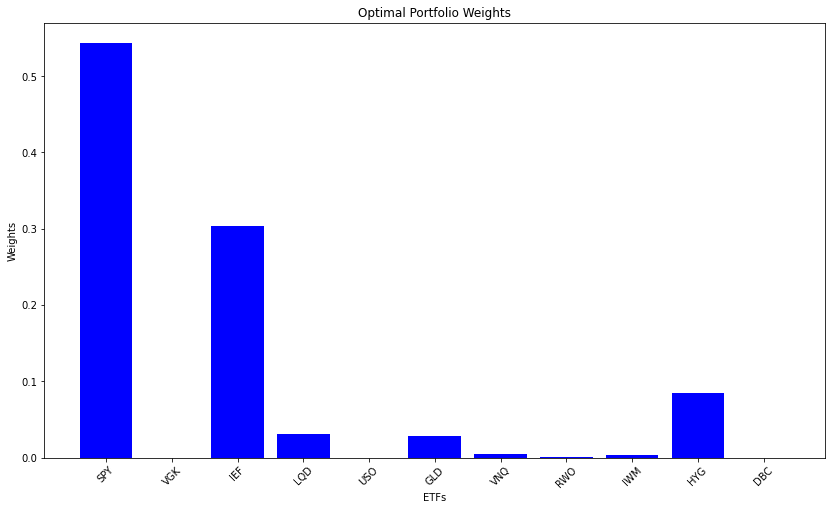

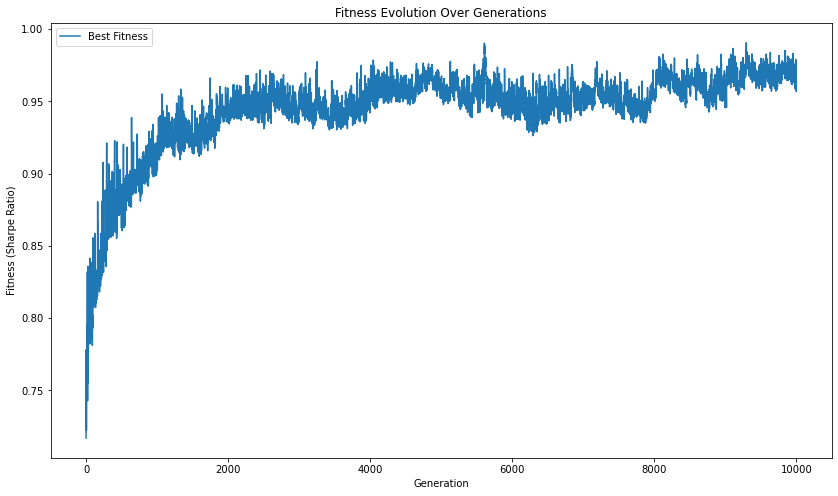

In [31]:
plt.figure(figsize=(14, 8), facecolor='white')
plt.bar(etfs, best_solution, color='blue', alpha=1)
plt.xlabel('ETFs')
plt.ylabel('Weights')
plt.title('Optimal Portfolio Weights')
plt.xticks(rotation=45)
plt.show()

# Line chart of best fitness over generations
plt.figure(figsize=(14, 8), facecolor='white')
plt.plot(best_fitness_over_time, label='Best Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness (Sharpe Ratio)')
plt.title('Fitness Evolution Over Generations')
plt.legend()
plt.show()